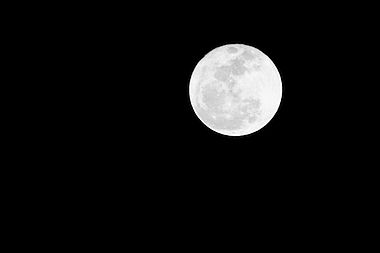

In [170]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

image1 = Image.open('1.jpg')

image1

# width, height = f2.size
# print(width,height)

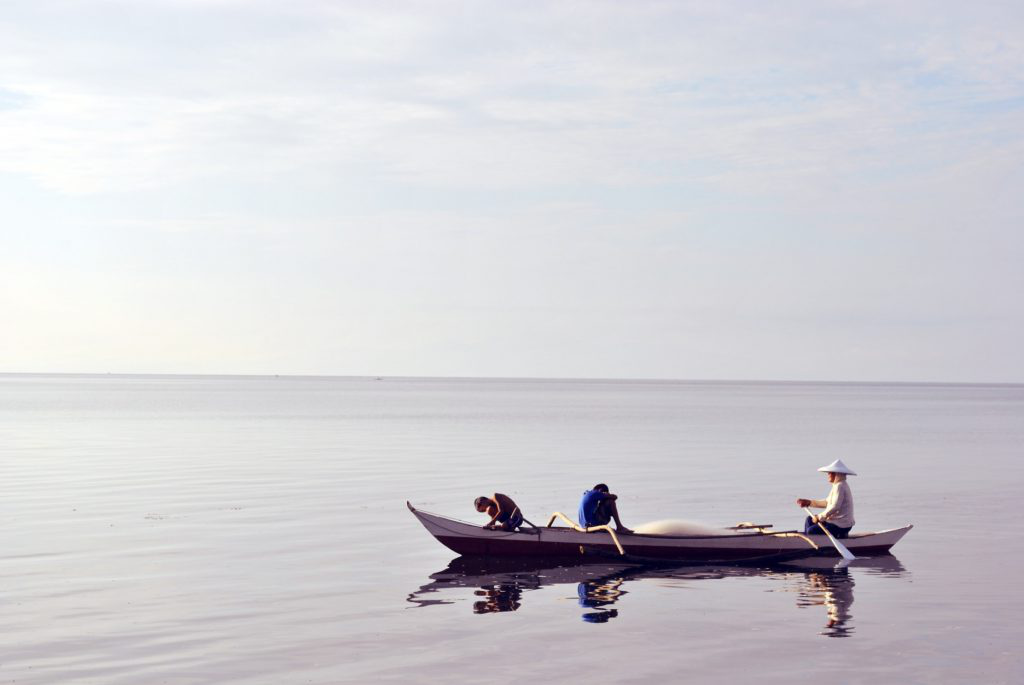

In [171]:
image2 = Image.open('2.jpg')

image2

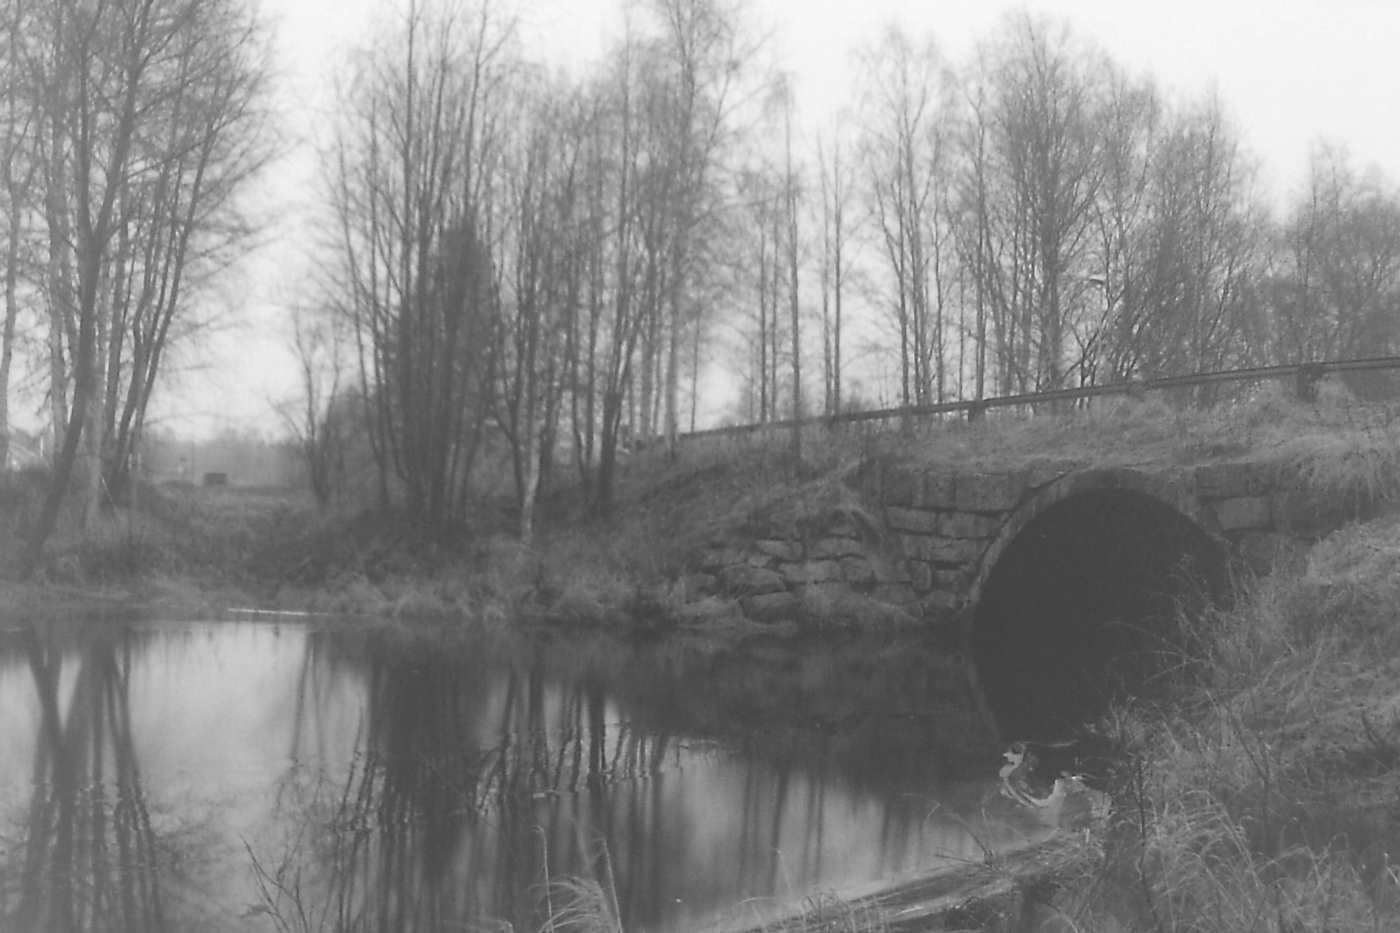

In [172]:
image3 = Image.open('3.png')

image3

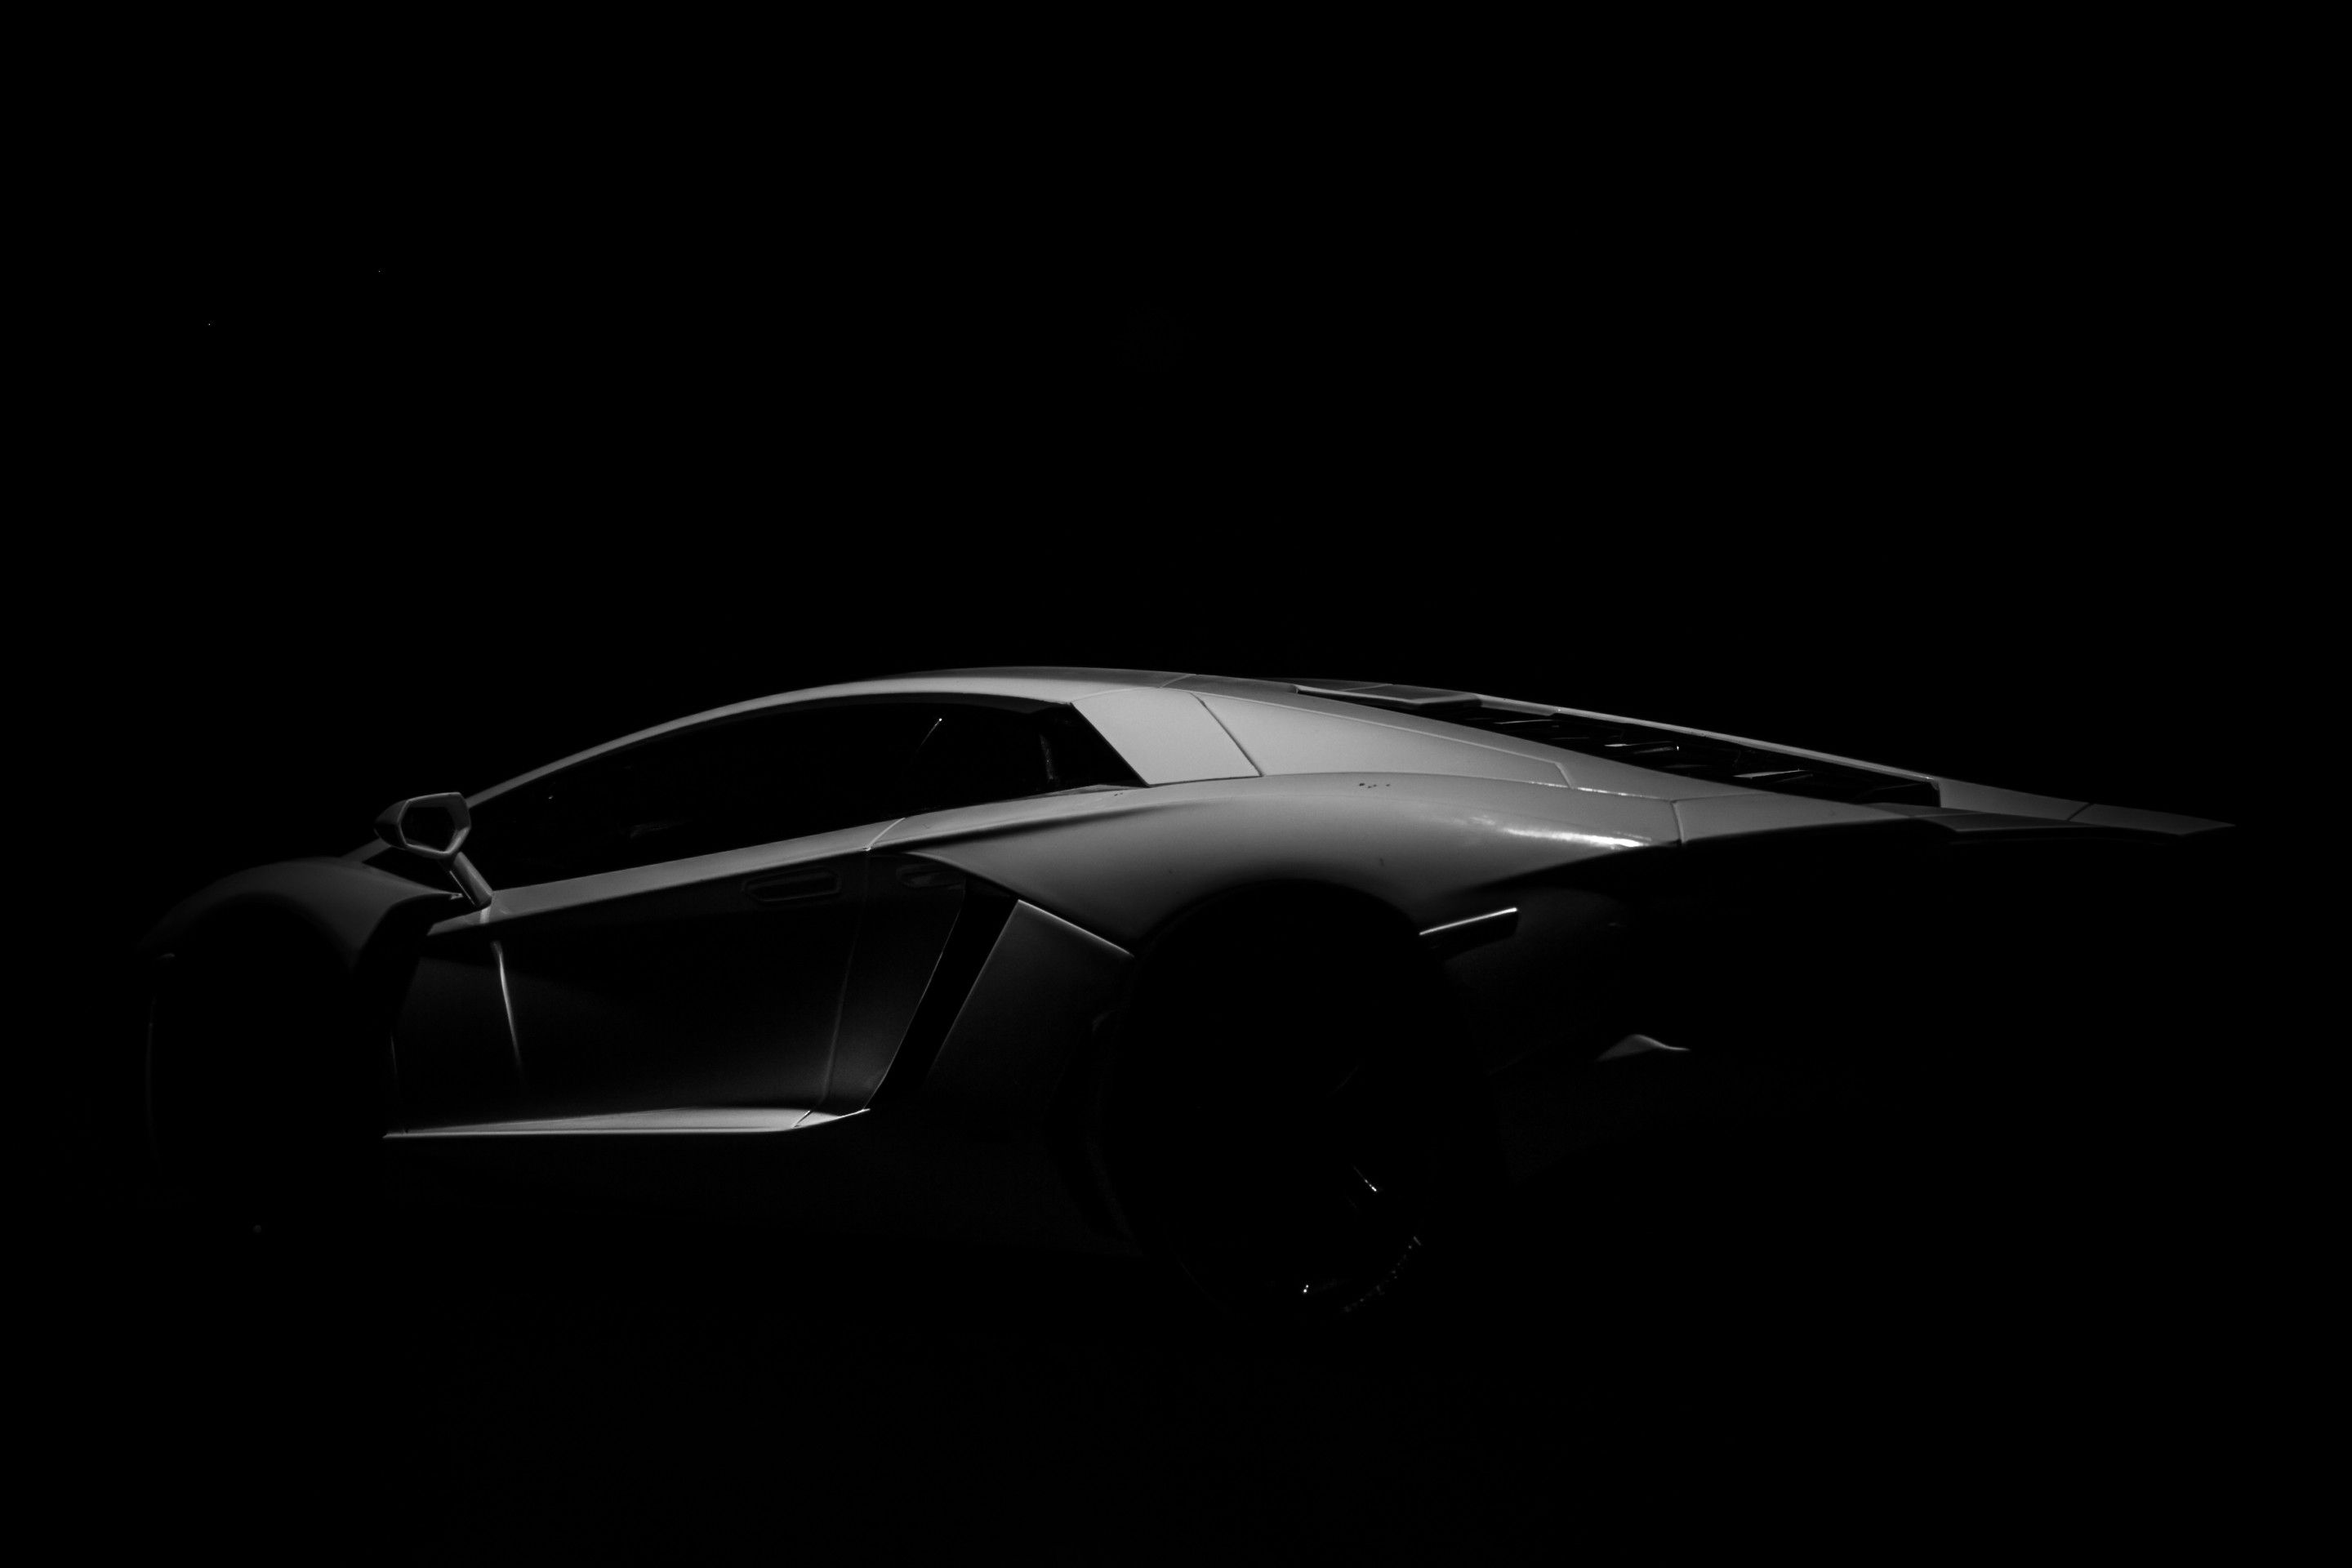

In [173]:
image4 = Image.open('4.jpg')

image4

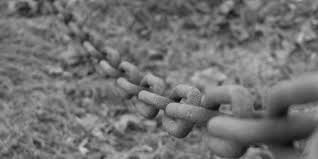

In [174]:
image5 = Image.open('5.jpg')

image5

In [175]:
image1Gray = image1.convert('L')
image_array1 = np.array(image1Gray)
image_array1
rows1 = len(image_array1)
columns1 = len(image_array1[0])
print(type(int(image_array1[0][0])))
image_array1

<class 'int'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [176]:
image2Gray = image2.convert('L')
image_array2 = np.array(image2Gray)
image_array2
rows2 = len(image_array2)
columns2 = len(image_array2[0])
print(type(int(image_array2[0][0])))
image_array2

<class 'int'>


array([[238, 238, 238, ..., 205, 205, 204],
       [237, 237, 237, ..., 205, 205, 204],
       [236, 236, 236, ..., 205, 204, 204],
       ...,
       [186, 186, 185, ..., 164, 164, 164],
       [189, 189, 189, ..., 161, 162, 162],
       [193, 193, 193, ..., 159, 159, 160]], dtype=uint8)

In [177]:
image3Gray = image3.convert('L')
image_array3 = np.array(image3Gray)
image_array3
rows3 = len(image_array3)
columns3 = len(image_array3[0])
print(type(int(image_array3[0][0])))
image_array3

<class 'int'>


array([[187, 183, 179, ..., 244, 244, 244],
       [187, 184, 178, ..., 244, 244, 244],
       [185, 184, 179, ..., 244, 244, 244],
       ...,
       [117, 116, 116, ..., 115, 115, 115],
       [119, 118, 115, ..., 118, 117, 117],
       [122, 119, 115, ..., 118, 119, 120]], dtype=uint8)

In [178]:
image4Gray = image4.convert('L')
image_array4 = np.array(image4Gray)
image_array4
rows4 = len(image_array4)
columns4 = len(image_array4[0])
print(type(int(image_array4[0][0])))
image_array4

<class 'int'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [179]:
image5Gray = image5.convert('L')
image_array5 = np.array(image5Gray)
image_array5
rows5 = len(image_array5)
columns5 = len(image_array5[0])
print(type(int(image_array5[0][0])))
image_array5

<class 'int'>


array([[102, 107, 113, ..., 130, 135, 137],
       [108, 112, 115, ..., 132, 136, 138],
       [115, 116, 115, ..., 135, 137, 138],
       ...,
       [ 95,  89,  84, ..., 144, 141, 139],
       [ 88,  88,  91, ..., 145, 142, 139],
       [ 88,  89,  94, ..., 145, 142, 140]], dtype=uint8)

In [180]:
testArray = [[0,1,2,2,3,3,3],[4,4,4,5,5,5,6]]

def CalculateHistogram(inputImage):
  inputImageArray = np.array(inputImage)
  rows = len(inputImageArray)
  columns = len(inputImageArray[0])
  histogram = [0] * 256
  for j in range(columns):
    for i in range(rows):
      histogram[int(inputImageArray[i][j])] += 1

  return histogram

#histogram = CalculateHistogram(image1)
#print((CalculateHistogram(image1)))

In [181]:
def CalculateCumulativeHistogram(histogram):
  for i in range(0,256):
    if (i > 0):
        histogram[i] = histogram[i] + histogram[i-1]

  return histogram

#cumulativeHistogram = CalculateCumulativeHistogram(histogram)
#print(CalculateCumulativeHistogram(histogram))
#print(len(image_array) * len(image_array[0]))

In [182]:
def CalculateEqualizedHistogram(cumlativeHist):
  newPixelIntensities = np.zeros(256)
  for i in range(0,256):
    newPixelIntensities[i] = round((255/((cumlativeHist[255])-(cumlativeHist[0])))*(cumlativeHist[i]-cumlativeHist[0]))
  return newPixelIntensities

#equlizedHistogram = CalculateEqualizedHistogram(cumulativeHistogram)


In [201]:
def CalculateEqualizedImage(originalImage, equalizedHistogram):
  imageArray = np.array(originalImage)
  rows = len(imageArray)
  columns = len(imageArray[0])
  for i in range(rows):
    for j in range(columns):
      imageArray[i][j] = equalizedHistogram[imageArray[i][j]]
    
  plt.imshow(imageArray, cmap="gray")
  plt.show()
  return imageArray

#CalculateEqualizedImage(image1Gray, equlizedHistogram)

In [184]:
def SegmentOptimalThresholding(im):
    array = np.array(im)
    w,h = array.shape
    #Initialize object pixels threshold
    objectThreshold = 0
    #Initialize background pixels to be corners
    background = [(0,0) , (w-1,0) , (0,h-1) , (w-1,h-1)]
    #Initizialize background threshold
    backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4
    nObjectPixels = 0
    
    #Loop on object pixels
    for x in range(0,w):
        for y in range(0,h):
            if((x,y) not in background):
                #Compute object pixel threshold
                nObjectPixels += 1
                objectThreshold += array[x][y]
    objectThreshold = (objectThreshold / nObjectPixels)
    #Compute average of background and object pixel thresholds
    newThreshold = (backThreshold + objectThreshold)/2
    
    #Loop until previous threshold is equal to the current threshold
    while True:
        OldThreshold = newThreshold
        backThreshold = 0
        objectThreshold = 0
        backLen = 0
        objLen = 0
        for x in range(0,w):
            for y in range(0,h):
                if(array[x][y] < OldThreshold):
                    backThreshold += array[x][y]
                    backLen += 1
                else:
                    objectThreshold += array[x][y]
                    objLen += 1
        objectThreshold = objectThreshold / objLen
        backThreshold = backThreshold / backLen
        newThreshold = (backThreshold + objectThreshold)/2
        if(newThreshold == OldThreshold):
            break
        for x in range(0,w):
            for y in range(0,h):
                if(array[x][y] < newThreshold):
                    array[x][y] = 0
                else:
                    array[x][y] = 1
        return array

Output Images from segmentation without histogram equalization:

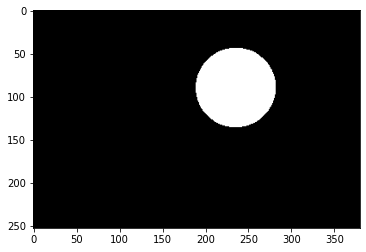

In [185]:
SegmentedImage1 = SegmentOptimalThresholding(image1Gray)
plt.imshow(SegmentedImage1, cmap='gray')

<ipython-input-184-d47bc37f0cf9>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4


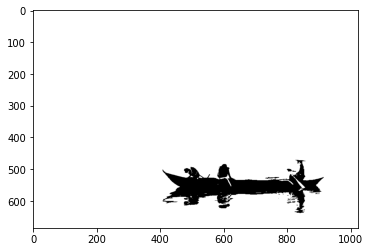

In [186]:
SegmentedImage2 = SegmentOptimalThresholding(image2Gray)
plt.imshow(SegmentedImage2, cmap='gray')

<ipython-input-184-d47bc37f0cf9>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4


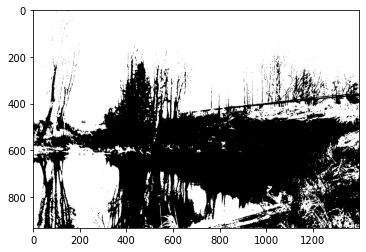

In [187]:
SegmentedImage3 = SegmentOptimalThresholding(image3Gray)
plt.imshow(SegmentedImage3, cmap='gray')

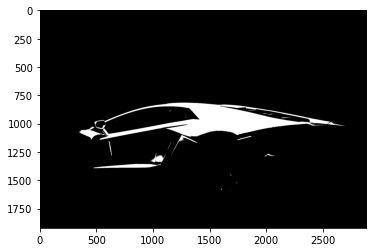

In [188]:
SegmentedImage4 = SegmentOptimalThresholding(image4Gray)
plt.imshow(SegmentedImage4, cmap='gray')

<ipython-input-184-d47bc37f0cf9>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4


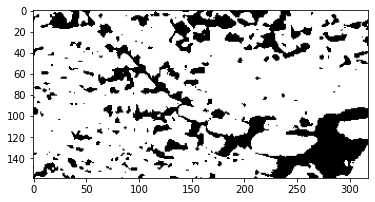

In [189]:
SegmentedImage5 = SegmentOptimalThresholding(image5Gray)
plt.imshow(SegmentedImage5, cmap='gray')

Output images from applying histogram equalization:

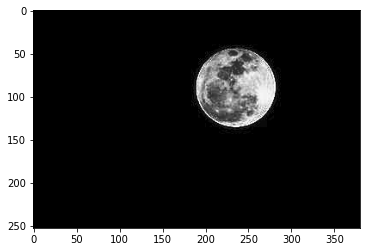

In [203]:
#Image1
hist1 = CalculateHistogram(image1Gray)
cHist1 = CalculateCumulativeHistogram(hist1)
eqHist1 = CalculateEqualizedHistogram(cHist1)
eqImage1 = CalculateEqualizedImage(image1Gray, eqHist1)

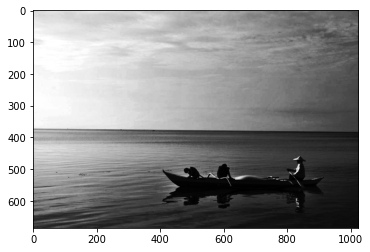

array([[220, 220, 220, ...,  82,  82,  78],
       [214, 214, 214, ...,  82,  82,  78],
       [211, 211, 211, ...,  82,  78,  78],
       ...,
       [ 37,  37,  35, ...,  13,  13,  13],
       [ 44,  44,  44, ...,  12,  12,  12],
       [ 51,  51,  51, ...,  12,  12,  12]], dtype=uint8)

In [204]:
#Image2
hist2 = CalculateHistogram(image2Gray)
cHist2 = CalculateCumulativeHistogram(hist2)
eqHist2 = CalculateEqualizedHistogram(cHist2)
eqImage2 = CalculateEqualizedImage(image2Gray, eqHist2)
eqImage2

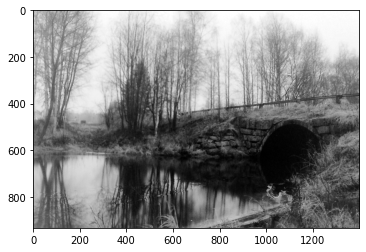

array([[209, 206, 202, ..., 250, 250, 250],
       [209, 206, 201, ..., 250, 250, 250],
       [207, 206, 202, ..., 250, 250, 250],
       ...,
       [122, 119, 119, ..., 116, 116, 116],
       [126, 124, 116, ..., 124, 122, 122],
       [132, 126, 116, ..., 124, 126, 128]], dtype=uint8)

In [205]:
#Image3
hist3 = CalculateHistogram(image3Gray)
cHist3 = CalculateCumulativeHistogram(hist3)
eqHist3 = CalculateEqualizedHistogram(cHist3)
eqImage3 = CalculateEqualizedImage(image3Gray, eqHist3)
eqImage3

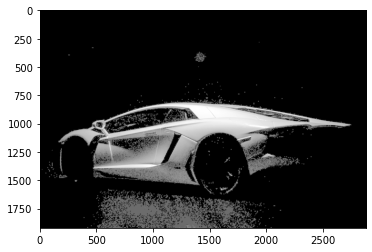

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [206]:
#Image4
hist4 = CalculateHistogram(image4Gray)
cHist4 = CalculateCumulativeHistogram(hist4)
eqHist4 = CalculateEqualizedHistogram(cHist4)
eqImage4 = CalculateEqualizedImage(image4Gray, eqHist4)
eqImage4

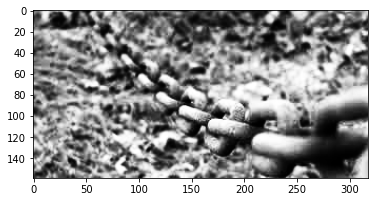

array([[ 83,  99, 121, ..., 184, 200, 206],
       [103, 117, 128, ..., 191, 203, 209],
       [128, 132, 128, ..., 200, 206, 209],
       ...,
       [ 62,  48,  38, ..., 223, 216, 212],
       [ 46,  46,  53, ..., 225, 218, 212],
       [ 46,  48,  60, ..., 225, 218, 214]], dtype=uint8)

In [207]:
#Image5
hist5 = CalculateHistogram(image5Gray)
cHist5 = CalculateCumulativeHistogram(hist5)
eqHist5 = CalculateEqualizedHistogram(cHist5)
eqImage5 = CalculateEqualizedImage(image5Gray, eqHist5)
eqImage5

Output images of segmentation after histogram equalization:

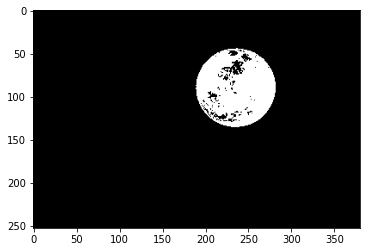

In [209]:
eqseg1 = SegmentOptimalThresholding(eqImage1)
plt.imshow(eqseg1, cmap='gray')

<ipython-input-184-d47bc37f0cf9>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4


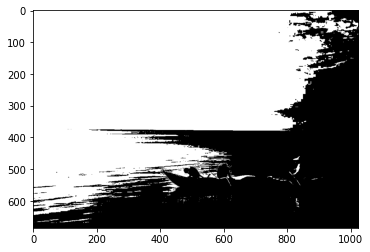

In [210]:
eqseg2 = SegmentOptimalThresholding(eqImage2)
plt.imshow(eqseg2, cmap='gray')

<ipython-input-184-d47bc37f0cf9>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4


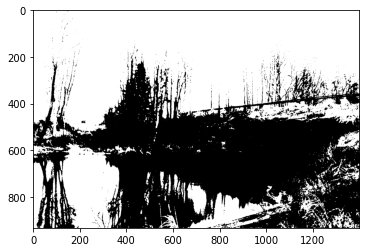

In [211]:
eqseg3 = SegmentOptimalThresholding(eqImage3)
plt.imshow(eqseg3, cmap='gray')

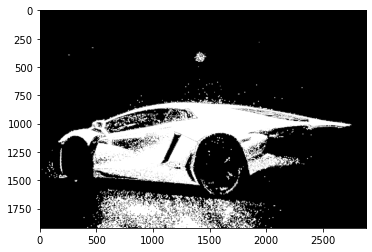

In [212]:
eqseg4 = SegmentOptimalThresholding(eqImage4)
plt.imshow(eqseg4, cmap='gray')

<ipython-input-184-d47bc37f0cf9>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  backThreshold = (array[0][0] + array[w-1][0] + array[0][h-1] + array[w-1][h-1])/4


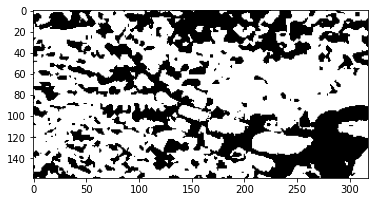

In [213]:
eqseg5 = SegmentOptimalThresholding(eqImage5)
plt.imshow(eqseg5, cmap='gray')

Comments on segmentation after histogram equalization or without histogram equalization

Image 2:

For image 2, it would appear that histogram equalization before segmentation is actually counterproductive, in which the background was given emphasis rather than the object(the boat).

Image 3:
For image 3, segmentation after equalization, and without equalization produced nearly identical results. Histogram equalization in this case had no effect on the output of the segmentation.

Image 4:
For image 4, histogram equalization before segmentation produced better results, in which the object was given more emphasis than the background in comparison to simply using segmentation without histogram equalization.

Image 5:
For image 5, histogram equalization before segmentation produced a very minor difference in comparison to without. The object was not well emphasised in both approaches. Outlines were however more apparent when using histogram equalization before segmentation.



In conclusion, histogram equalization before segmentation does not always aid segmentation.